## CSE627 HW01

This is a Jupyter notebook submitted for CSE627 HW1 Q4. This notebook is my attempt to reproduce PRML book figures 1.7 and 1.8.

--by Xian Liu (liux13@miamioh.edu)

In [27]:
import numpy as np
import pandas as pd

%pylab inline
np.random.seed(127)

Populating the interactive namespace from numpy and matplotlib


/home/femianjc/anaconda2/envs/femiani/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
MEAN, SIGMA = 0, 0.3
M = 9
plt.rcParams['figure.figsize'] =[12, 4]
cols = [ 'x_{}'.format(p) for p in range(0, M + 1)]         # colums needed for training

In [29]:
cols

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9']

In [30]:
def sample_provider(size, M=9, mean=0, sigma=0.1, make_ideal=False):
    """
    This function draws data points from a sine function with gaussian noise. Columns 'x_n' indicates x
    being raised to the power of n. The upper limit of n is specified by parameter M. When make_ideal 
    evaluates true, an additional colomn "y" with no noise will be added. Returns a DataFrame object.
    """
    x_1 = np.linspace(0,1,num=size)
    x_0 = np.ones_like(x_1)
    offsets = np.random.normal(loc=mean, scale=sigma, size=size)
    y_true = np.sin(2 * np.pi *x_1) + offsets
    df = pd.DataFrame(np.column_stack([x_0, x_1, y_true]), columns=['x_0', 'x_1', 'y_true'])
    
    for power in range(2, M+1):
        colname = 'x_{}'.format(power)
        df[colname] = df['x_1'] ** power
    if make_ideal:
        y = np.sin(2 * np.pi *x_1)
        df = df.assign(y=y)
    return df

,x_0,x_1,y_true,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,y
0,1.0,0.000000,-0.176001,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,1.0,0.010101,0.124877,0.000102,0.000001,1.041020e-08,1.051536e-10,1.062157e-12,1.072886e-14,1.083723e-16,1.094670e-18,0.063424
2,1.0,0.020202,0.394792,0.000408,0.000008,1.665633e-07,3.364914e-09,6.797807e-11,1.373294e-12,2.774332e-14,5.604711e-16,0.126592
3,1.0,0.030303,0.162868,0.000918,0.000028,8.432265e-07,2.555232e-08,7.743127e-10,2.346402e-11,7.110309e-13,2.154639e-14,0.189251
4,1.0,0.040404,0.325314,0.001632,0.000066,2.665012e-06,1.076773e-07,4.350596e-09,1.757817e-10,7.102290e-12,2.869612e-13,0.251148


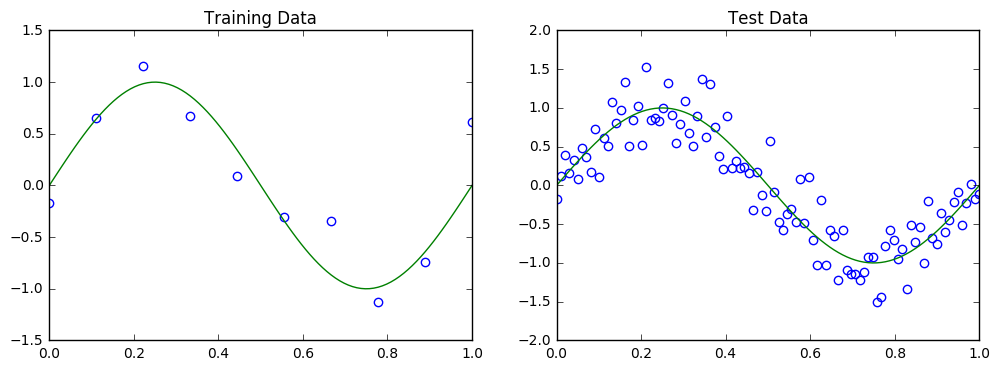

In [31]:
train = sample_provider(10, mean=MEAN, sigma=SIGMA, make_ideal=False)
test = sample_provider(100, mean=MEAN, sigma=SIGMA, make_ideal=True)

subplot(1,2,1)
title("Training Data")
plot(train['x_1'], train['y_true'], 'o', markerfacecolor='none', markeredgewidth=1, markeredgecolor='b')
plot(test['x_1'], test['y'], 'g')
subplot(1,2,2)
title("Test Data")
plot(test['x_1'], test['y_true'], 'o', markerfacecolor='none', markeredgewidth=1, markeredgecolor='b')
plot(test['x_1'], test['y'], 'g')
test.head()

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

def ridge_regression(lnlambda, compare=True):
    """
    This function trains a ridge regressor. Erms(train, loss) is only returned when compare evaluates True.
    A plot will be generated otherwise.
    """
    rg = Ridge(alpha=np.exp(lnlambda)/2, normalize=False)
    rg.fit(train[cols], train['y_true'])
    test_pred = rg.predict(test[cols])
    train_pred = rg.predict(train[cols])
    if compare:
        train_loss = sqrt(mean_squared_error(train['y_true'], train_pred))
        test_loss = sqrt(mean_squared_error(test['y_true'], test_pred))
        return train_loss, test_loss
    else:
        plt.text(.7, .7 , r'$\ln \lambda = {}$'.format(lnlambda), fontsize=11)
        plot(train['x_1'], train['y_true'],'o', markerfacecolor='none', markeredgewidth=1, markeredgecolor='b')
        plot(test['x_1'], test['y'], 'g')
        plot(test['x_1'], test_pred, 'r')
        xtext = plt.xlabel('$x$', fontsize=14)
        ytext = plt.ylabel('$t$', fontsize=14)

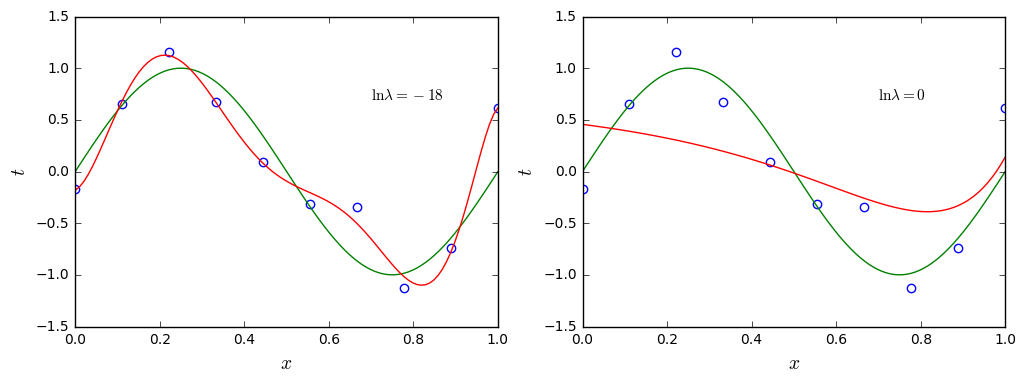

In [34]:
subplot(1,2,1)
ridge_regression(-18, compare=False)
subplot(1,2,2)
ridge_regression(0, compare=False)

In [35]:
xs = np.linspace(-35, 0, 100)
ys = np.array([ridge_regression(x, compare=True) for x in xs])

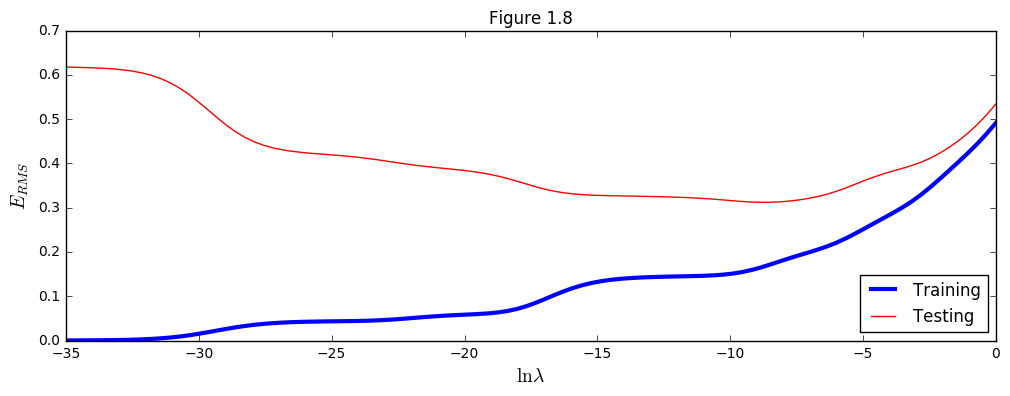

In [36]:
fig, ax = plt.subplots()
title('Figure 1.8')
training, = ax.plot(xs, ys[:,0], 'b', lw=3, label='Training')
testing, = ax.plot(xs, ys[:,1], 'r', label='Testing')
ax.legend(loc='lower right')
xtext = plt.xlabel('$\ln \lambda$', fontsize=14)
ytext = plt.ylabel('$E_{RMS}$', fontsize=14)